In [2207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2208]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [2209]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [2210]:
df.columns

Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [2211]:
#sns.pairplot(df)

## Correlation Heatmap


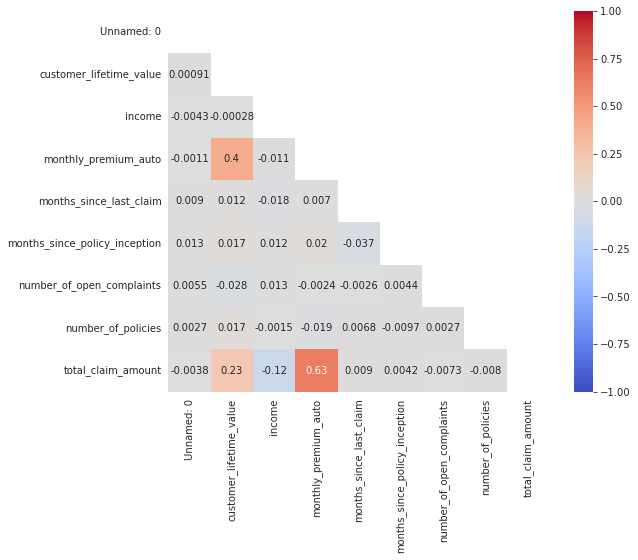

In [2212]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [2213]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
drop_col = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.39)]

In [2214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [2215]:
#df.drop(drop_col,\
#           axis=1,inplace=True)

In [2216]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

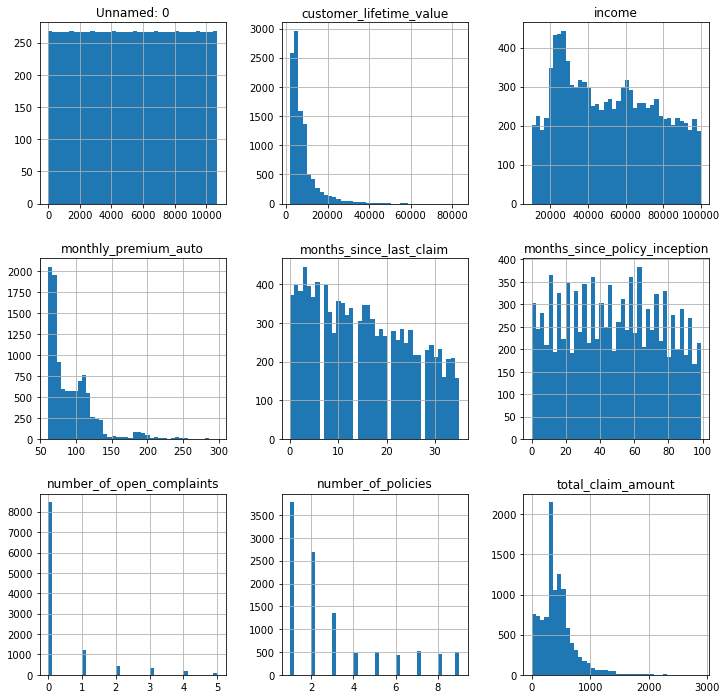

In [2217]:
df.select_dtypes('int').hist(figsize=(12,12), bins=40)

## Transforming to normal distribution (using QuantileTransformer)

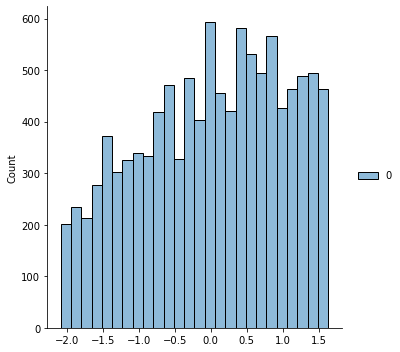

In [2218]:
## months_since_policy_inception

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")
months_since_policy_inception_transformed=pt.fit_transform(df['months_since_policy_inception'].to_numpy().reshape(-1,1))
sns.displot(months_since_policy_inception_transformed)

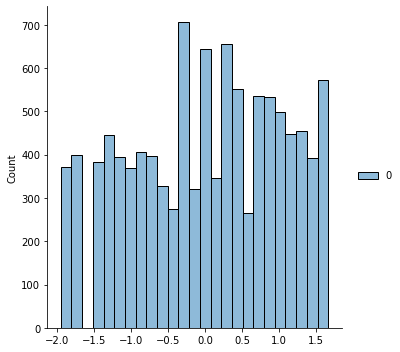

In [2219]:
## months_since_last_claim

months_since_last_claim_transformed=pt.fit_transform(df['months_since_last_claim'].to_numpy().reshape(-1,1))
sns.displot(months_since_last_claim_transformed)

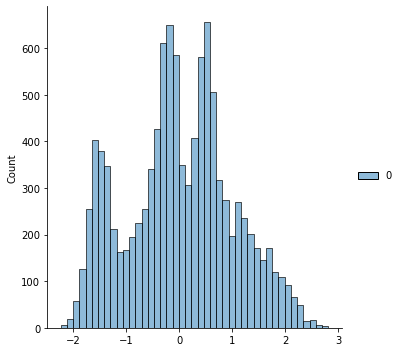

In [2220]:
## customer_lifetime_value_transformed
customer_lifetime_value_transformed=pt.fit_transform(df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_value_transformed)

In [2221]:
## total_claim_amount
#total_claim_amount_transformed=pt.fit_transform(df['total_claim_amount'].to_numpy().reshape(-1,1))
#sns.displot(total_claim_amount_transformed)



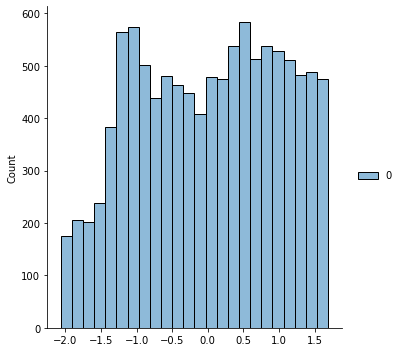

In [2222]:
##income using QuantileTransformer


income_transformed=pt.fit_transform(df['income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

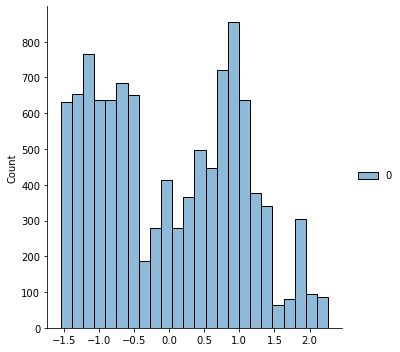

In [2223]:
## monthly premium auto
monthly_premium_auto_transformed=pt.fit_transform(df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)


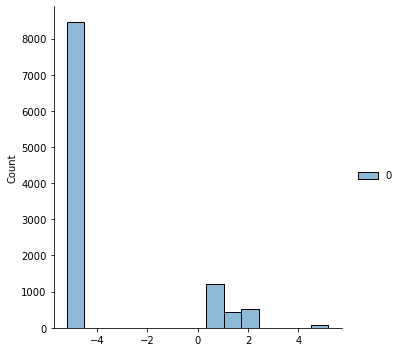

In [2224]:
## 'number_of_open_complaints'
number_of_open_complaints_transformed=qt.fit_transform(df['number_of_open_complaints'].to_numpy().reshape(-1,1))
sns.displot(number_of_open_complaints_transformed)

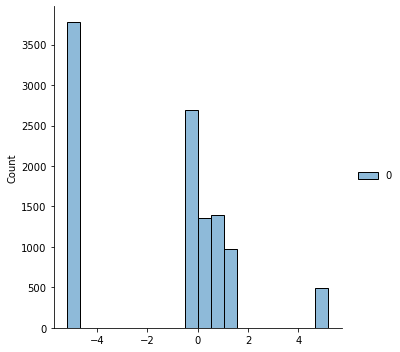

In [2225]:
## 'number_of_policies'
number_of_policies_transformed=qt.fit_transform(df['number_of_policies'].to_numpy().reshape(-1,1))
sns.displot(number_of_policies_transformed)

In [2226]:
## add transformed columns, drop untransformed

In [2227]:
transformed_cols = ['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 
'monthly_premium_auto_transformed', 'income_transformed', 
'customer_lifetime_value_transformed', 'number_of_policies_transformed', 'number_of_open_complaints_transformed']


df["months_since_last_claim_transformed"]= months_since_last_claim_transformed
df.drop(["months_since_last_claim"],axis=1,inplace=True)


df["months_since_policy_inception_transformed"]= months_since_policy_inception_transformed
df.drop(["months_since_policy_inception"],axis=1,inplace=True)


df["monthly_premium_auto_transformed"]= monthly_premium_auto_transformed
df.drop(["monthly_premium_auto"],axis=1,inplace=True)

df["income_transformed"]= income_transformed
df.drop(["income"],axis=1,inplace=True)


df["customer_lifetime_value_transformed"]= customer_lifetime_value_transformed
df.drop(["customer_lifetime_value"],axis=1,inplace=True)

df["number_of_policies_transformed"]= number_of_policies_transformed
df.drop(["number_of_policies"],axis=1,inplace=True)

df["number_of_open_complaints_transformed"]= number_of_open_complaints_transformed
df.drop(["number_of_open_complaints"],axis=1,inplace=True)

In [2228]:
df

,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,number_of_policies_transformed,number_of_open_complaints_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,292,four-door car,medsize,-0.707585,0.226102,-1.543067,-0.025953,-0.336143,5.199338,-5.199338
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,744,four-door car,medsize,-1.287286,-0.713030,-1.257388,-0.988621,-1.867205,-5.199338,-5.199338
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,480,suv,medsize,1.594909,-0.517163,0.630095,-1.244098,1.292270,-0.051460,-5.199338
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,484,four-door car,medsize,-0.356663,-1.844389,0.536569,0.015717,1.731625,-0.051460,-5.199338
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,707,four-door car,medsize,0.144039,-0.517163,1.051350,-1.157227,0.646025,1.210137,1.029375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,1214,luxury car,medsize,-0.584960,-0.185352,2.153036,0.596834,1.339279,1.210137,1.439001
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,273,four-door car,medsize,-0.707585,0.735155,-1.169288,0.467997,-0.183187,1.004131,-5.199338
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,381,luxury suv,medsize,-0.249493,0.580123,1.942693,-0.367370,1.799731,-0.051460,-5.199338
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,618,suv,medsize,-1.950493,-0.673076,1.631315,0.575424,1.021741,1.004131,2.183092


## Transforming number_of_open_complaints and number_of_policies to Object

In [2229]:
#df['number_of_open_complaints'] = df['number_of_open_complaints'].astype('object')
#df['number_of_policies']=df['number_of_policies'].astype('object')

In [2230]:
categoricals_features=df.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## remove outliers

In [2231]:
print(transformed_cols)

df

['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 'monthly_premium_auto_transformed', 'income_transformed', 'customer_lifetime_value_transformed', 'number_of_policies_transformed', 'number_of_open_complaints_transformed']


,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,number_of_policies_transformed,number_of_open_complaints_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,292,four-door car,medsize,-0.707585,0.226102,-1.543067,-0.025953,-0.336143,5.199338,-5.199338
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,744,four-door car,medsize,-1.287286,-0.713030,-1.257388,-0.988621,-1.867205,-5.199338,-5.199338
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,480,suv,medsize,1.594909,-0.517163,0.630095,-1.244098,1.292270,-0.051460,-5.199338
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,484,four-door car,medsize,-0.356663,-1.844389,0.536569,0.015717,1.731625,-0.051460,-5.199338
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,707,four-door car,medsize,0.144039,-0.517163,1.051350,-1.157227,0.646025,1.210137,1.029375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,1214,luxury car,medsize,-0.584960,-0.185352,2.153036,0.596834,1.339279,1.210137,1.439001
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,273,four-door car,medsize,-0.707585,0.735155,-1.169288,0.467997,-0.183187,1.004131,-5.199338
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,381,luxury suv,medsize,-0.249493,0.580123,1.942693,-0.367370,1.799731,-0.051460,-5.199338
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,618,suv,medsize,-1.950493,-0.673076,1.631315,0.575424,1.021741,1.004131,2.183092


In [2232]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in transformed_cols: 
    remove_outlier(df, i )
    


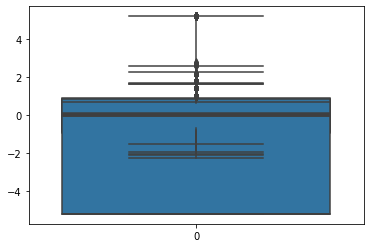

In [2233]:
for i in transformed_cols:
    ax = sns.boxplot(data=df[i])
    
plt.show()

## One-hot encoding
 Also get nominal encoding
 Use sciekitlearn 

In [2234]:
col_names_object = list(df.select_dtypes("object").columns)
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [2235]:
categoricals_features=pd.get_dummies(categoricals_features[col_names_object], drop_first=True)


In [2236]:
list(categoricals_features.columns)

['region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/3/11',
 'effective_to_date_1/30/11',
 'effective_to_date_1/31/11',
 'effective_to_date_1/4/11',
 'effective_to_date_1/5/11',
 'ef

##  Split X-y   "total-claim-amount"

In [2237]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']

In [2238]:
X=X._get_numeric_data()
X=X.drop(['Unnamed: 0'], axis = 1)

In [2239]:
X.columns

Index(['months_since_last_claim_transformed',
       'months_since_policy_inception_transformed',
       'monthly_premium_auto_transformed', 'income_transformed',
       'customer_lifetime_value_transformed', 'number_of_policies_transformed',
       'number_of_open_complaints_transformed'],
      dtype='object')

array([[<AxesSubplot:title={'center':'months_since_last_claim_transformed'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception_transformed'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto_transformed'}>],
       [<AxesSubplot:title={'center':'income_transformed'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value_transformed'}>,
        <AxesSubplot:title={'center':'number_of_policies_transformed'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints_transformed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

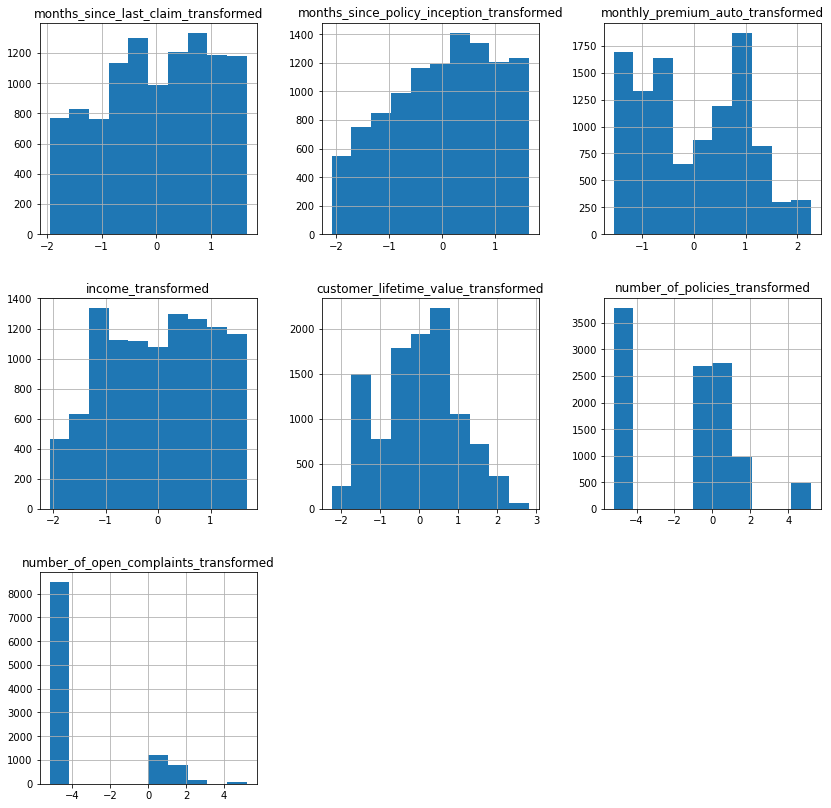

In [2240]:
X.hist(figsize=(14,14))

In [2241]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## standardize

In [2242]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [2243]:
X_train.shape

(7482, 7)

In [2244]:
X_test_scaled=std_scaler.transform(X_test)

In [2245]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.81795523  1.27629636 -0.77754691 ...  0.32997462  0.42016878
  -0.50972761]
 [-0.83366762  1.53128583 -0.92733872 ... -0.24260663  0.71163745
  -0.50972761]
 [-0.83366762  0.5553196   0.89843353 ... -0.48102283 -1.26125389
  -0.50972761]
 ...
 [-0.97166034 -1.48118793 -1.44887594 ... -1.66448717 -1.26125389
  -0.50972761]
 [ 0.96941419 -1.84114595 -1.08832257 ...  1.77858507  0.42016878
  -0.50972761]
 [ 0.89435904  0.29818383 -0.50741965 ...  1.38088528  0.42016878
   1.93507634]]
--------
[[ 0.41249601  1.41884483 -0.63788566 ... -0.20119286  2.13520764
  -0.50972761]
 [ 1.32684494  0.77268733 -0.70651115 ... -1.37253895 -1.26125389
   1.78421705]
 [-1.94513578  0.46005973 -1.44887594 ...  1.01729109  0.42016878
  -0.50972761]
 ...
 [ 0.89435904 -1.18249377 -0.5715573  ... -1.58719463 -1.26125389
  -0.50972761]
 [ 0.66076476 -1.84114595 -1.17338289 ... -0.23693875  0.66219387
   1.78421705]
 [ 1.52900525 -0.95806645  1.07316405 ... -0.41746808 -1.26125389
  -0.50972761]]


## Linear Regression

In [2246]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     479.1
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:35:26   Log-Likelihood:                -51757.
No. Observations:                7482   AIC:                         1.035e+05
Df Residuals:                    7474   BIC:                         1.036e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.826    153.216      0.0

In [2247]:
predictions_test

array([357.9687918 , 364.48782352, 238.60506708, ..., 325.38005154,
       277.2567674 , 647.70320142])

In [2248]:
#display adjusted R-squared
print(model.rsquared_adj)

0.30908376969726314


In [2249]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [2250]:
model.coef_

array([  3.59119674,   1.13764773, 160.11533426, -35.90788644,
        -0.56000761,  -4.17672285,   0.32812379])

In [2251]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [2252]:
X

,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,number_of_policies_transformed,number_of_open_complaints_transformed
0,-0.707585,0.226102,-1.543067,-0.025953,-0.336143,5.199338,-5.199338
1,-1.287286,-0.713030,-1.257388,-0.988621,-1.867205,-5.199338,-5.199338
2,1.594909,-0.517163,0.630095,-1.244098,1.292270,-0.051460,-5.199338
3,-0.356663,-1.844389,0.536569,0.015717,1.731625,-0.051460,-5.199338
4,0.144039,-0.517163,1.051350,-1.157227,0.646025,1.210137,1.029375
...,...,...,...,...,...,...,...
10684,-0.584960,-0.185352,2.153036,0.596834,1.339279,1.210137,1.439001
10685,-0.707585,0.735155,-1.169288,0.467997,-0.183187,1.004131,-5.199338
10686,-0.249493,0.580123,1.942693,-0.367370,1.799731,-0.051460,-5.199338
10687,-1.950493,-0.673076,1.631315,0.575424,1.021741,1.004131,2.183092


In [2253]:
## new record 
#new_data=[2000,450,18,25]
#new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,4))
#np.array(np.array(new_data).reshape(-1,4)).shape

In [2254]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [2255]:
y_pred

array([357.9687918 , 364.48782352, 238.60506708, ..., 325.38005154,
       277.2567674 , 647.70320142])

In [2256]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

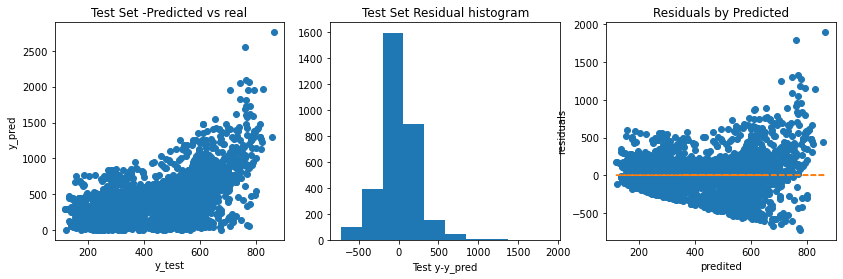

In [2257]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [2258]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

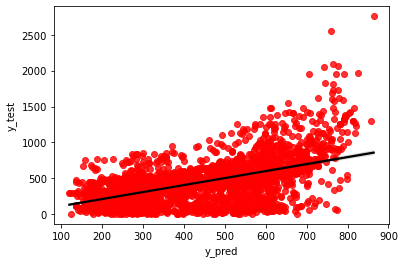

In [2259]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [2260]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  57072.036902327716
MAE test:  166.6146933940433
MSE train:  59708.73492111653
0.3158062675236206
R2_test:  0.3158062675236206
R2_train:  0.3097302626276359
MSE train - MSE test:  2636.698018788811
R2_test/R2_train:  1.0196170850224262
Adj_R2: 0.31430912587706406


## Add categoricals to model

In [2261]:
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [2262]:
categoricals_features

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [2263]:
## add one-hot encoded, drop cat

df = df.drop(col_names_object, axis=1)


In [2264]:
df[categoricals_features.columns] = categoricals_features
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

,Unnamed: 0,total_claim_amount,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,number_of_policies_transformed,number_of_open_complaints_transformed,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,292,-0.707585,0.226102,-1.543067,-0.025953,-0.336143,5.199338,-5.199338,0,...,0,0,0,0,0,0,0,0,1,0
1,1,744,-1.287286,-0.713030,-1.257388,-0.988621,-1.867205,-5.199338,-5.199338,0,...,0,1,0,0,0,0,0,0,1,0
2,2,480,1.594909,-0.517163,0.630095,-1.244098,1.292270,-0.051460,-5.199338,1,...,0,1,0,0,0,0,1,0,1,0
3,3,484,-0.356663,-1.844389,0.536569,0.015717,1.731625,-0.051460,-5.199338,0,...,1,0,0,0,0,0,0,0,1,0
4,4,707,0.144039,-0.517163,1.051350,-1.157227,0.646025,1.210137,1.029375,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,1214,-0.584960,-0.185352,2.153036,0.596834,1.339279,1.210137,1.439001,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,273,-0.707585,0.735155,-1.169288,0.467997,-0.183187,1.004131,-5.199338,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,381,-0.249493,0.580123,1.942693,-0.367370,1.799731,-0.051460,-5.199338,0,...,0,0,1,0,1,0,0,0,1,0
10687,10687,618,-1.950493,-0.673076,1.631315,0.575424,1.021741,1.004131,2.183092,0,...,1,0,0,0,0,0,1,0,1,0


In [2265]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
#X=X.drop(['Unnamed: 0', 'monthly_premium_auto_transformed'], axis = 1)
list(X.columns)

['Unnamed: 0',
 'months_since_last_claim_transformed',
 'months_since_policy_inception_transformed',
 'monthly_premium_auto_transformed',
 'income_transformed',
 'customer_lifetime_value_transformed',
 'number_of_policies_transformed',
 'number_of_open_complaints_transformed',
 'region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/2

In [2266]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [2267]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [2268]:
X_train.shape

(7482, 109)

In [2269]:
X_test_scaled=std_scaler.transform(X_test)

In [2270]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.40326385  0.81795523  1.27629636 ...  1.95232568  0.65494534
  -0.48945135]
 [ 0.10809117 -0.83366762  1.53128583 ...  1.95232568 -1.52684497
   2.04310398]
 [ 1.67208516 -0.83366762  0.5553196  ... -0.51220962  0.65494534
  -0.48945135]
 ...
 [-0.04710939 -0.97166034 -1.48118793 ...  1.95232568 -1.52684497
   2.04310398]
 [-1.30167428  0.96941419 -1.84114595 ... -0.51220962  0.65494534
  -0.48945135]
 [-0.57718898  0.89435904  0.29818383 ... -0.51220962  0.65494534
  -0.48945135]]
--------
[[-0.22628666  0.41249601  1.41884483 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.41842431  1.32684494  0.77268733 ... -0.51220962  0.65494534
  -0.48945135]
 [-0.26387177 -1.94513578  0.46005973 ...  1.95232568  0.65494534
  -0.48945135]
 ...
 [-1.24659266  0.89435904 -1.18249377 ...  1.95232568  0.65494534
  -0.48945135]
 [ 1.57196622  0.66076476 -1.84114595 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.78811918  1.52900525 -0.95806645 ...  1.95232568 -1.52684497
  -0.48945135]]


In [2271]:
## add transformed columns, drop untransformed

In [2272]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:35:29   Log-Likelihood:                -48029.
No. Observations:                7482   AIC:                         9.627e+04
Df Residuals:                    7375   BIC:                         9.701e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.729    250.497      0.0

In [2273]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [2274]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

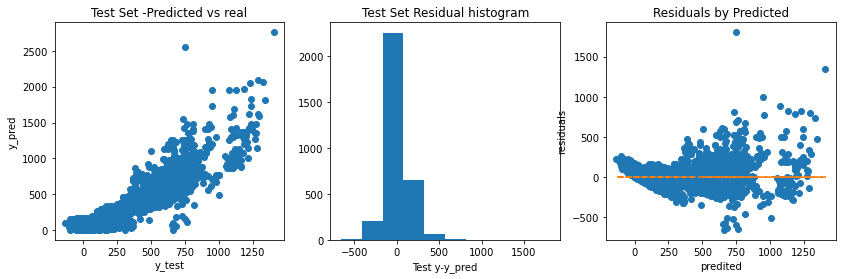

In [2275]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [2276]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

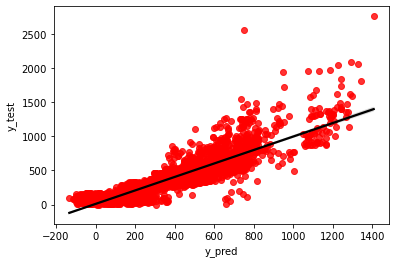

In [2277]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [2278]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  21305.703024917282
MAE test:  99.9899916293286
MSE train:  22042.100491453097
0.744581948238527
R2_test:  0.744581948238527
R2_train:  0.7451797473607221
MSE train - MSE test:  736.3974665358146
R2_test/R2_train:  0.9991977786241341
Adj_R2: 0.7355924204238675


## Feature importance

In [2279]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

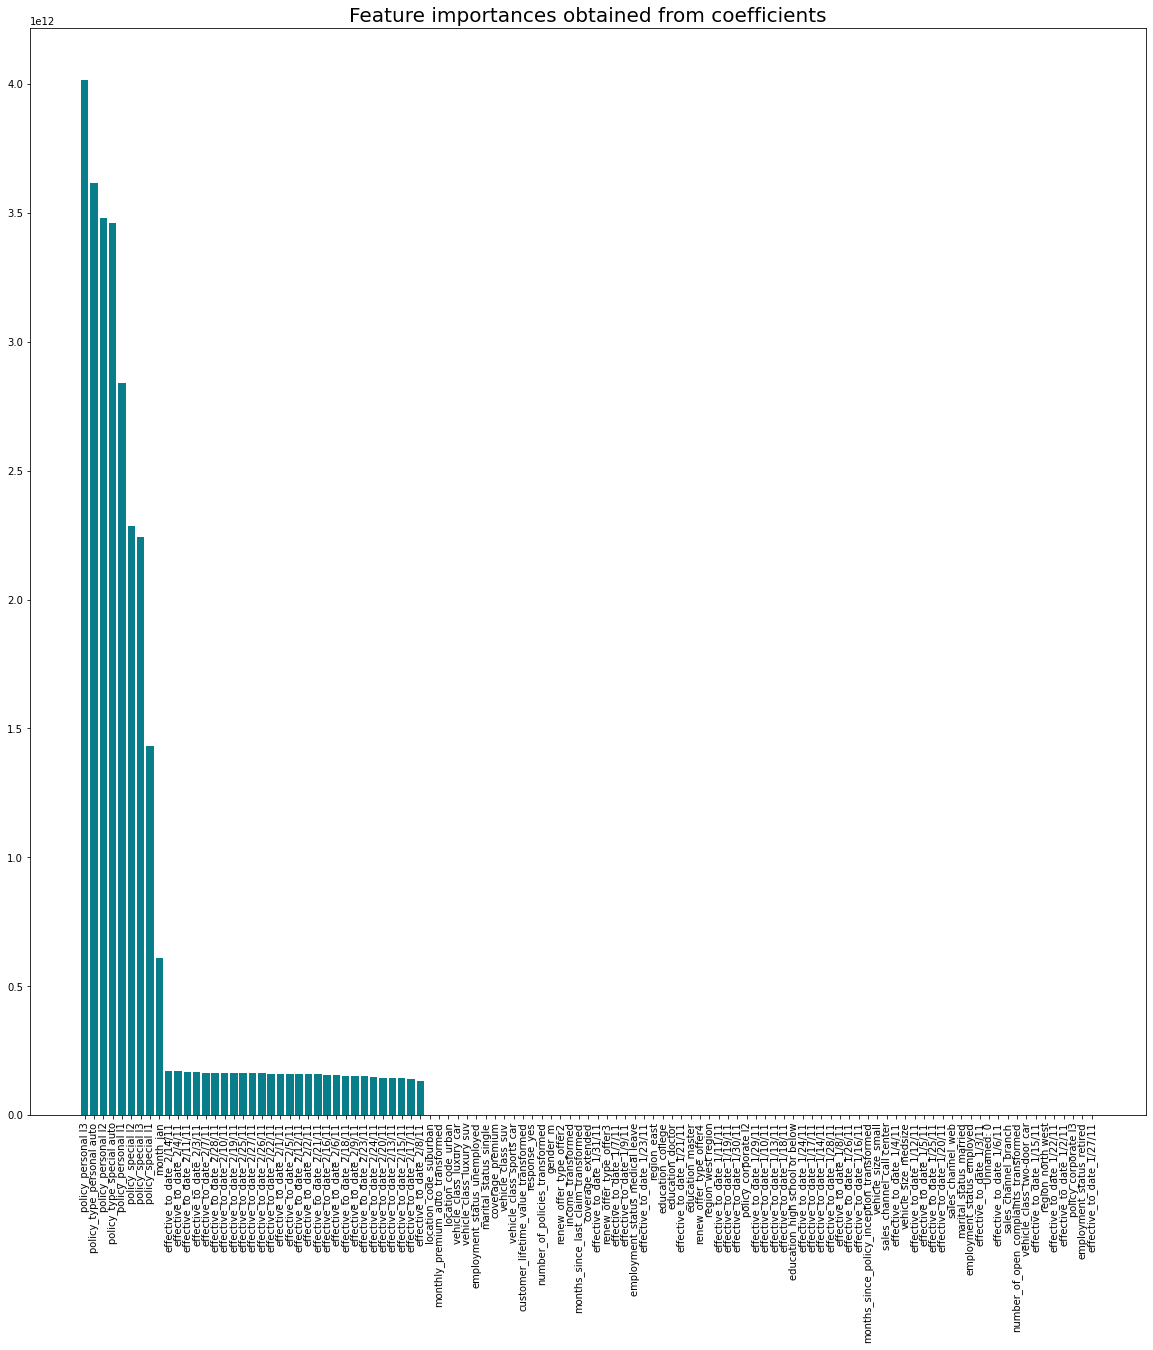

In [2280]:
plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## Trying to drop variables to get better AIC

In [2281]:
# Running RFE with the output number of the variable equal to 9

rfe = RFE(model)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
print(X_train.columns.size)

print(X_train.columns[rfe.support_].size)

[False False False  True False False False False False False False  True
 False  True False False False False False False False  True False False
 False False False False False  True False False False False False  True
 False False  True False False False False  True False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True False  True  True
 False  True  True  True False False  True  True  True  True  True  True
 False False False False False False  True  True  True  True False False
 False]
[56 33 48  1 30 41 42 54 12 51 35  1 10  1 21  8 36 17 23 13 29  1 24 40
 31 26 18 15 47  1  9 46  6 22 32  1 55 25  1  2 16  4 27  1 37  5 28  3
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 45  1 53  1  7  1  1 44  1  1  1 11 52  1  1  1  1  1  1
 14 19 20 50 39 38  1  1  1  1 49 43 34]
10

## Linear regression dropping columns that are not important form AIC optimization

In [2282]:
list(X.columns[rfe.support_])

X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
X=X[list(X.columns[rfe.support_])]
list(X.columns)


['monthly_premium_auto_transformed',
 'response_yes',
 'coverage_premium',
 'effective_to_date_1/13/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/5/11',
 'effective_to_date_2/1/11',
 'effective_to_date_2/10/11',
 'effective_to_date_2/11/11',
 'effective_to_date_2/12/11',
 'effective_to_date_2/13/11',
 'effective_to_date_2/14/11',
 'effective_to_date_2/15/11',
 'effective_to_date_2/16/11',
 'effective_to_date_2/17/11',
 'effective_to_date_2/18/11',
 'effective_to_date_2/19/11',
 'effective_to_date_2/2/11',
 'effective_to_date_2/20/11',
 'effective_to_date_2/21/11',
 'effective_to_date_2/22/11',
 'effective_to_date_2/23/11',
 'effective_to_date_2/24/11',
 'effective_to_date_2/25/11',
 'effective_to_date_2/26/11',
 'effective_to_date_2/27/11',
 'effective_to_date_2/28/11',
 'effective_to_date_2/3/11',
 'effective_to_date_2/4/11',
 'effective_to_date_2/5/11',
 'effective_to_date_2/6/11',
 'effective_to_date_2/7/11',
 'e

In [2283]:
X

,monthly_premium_auto_transformed,response_yes,coverage_premium,effective_to_date_1/13/11,effective_to_date_1/20/11,effective_to_date_1/26/11,effective_to_date_1/29/11,effective_to_date_1/5/11,effective_to_date_2/1/11,effective_to_date_2/10/11,...,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
0,-1.543067,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.257388,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.630095,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.536569,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.051350,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2.153036,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10685,-1.169288,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,1.942693,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10687,1.631315,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


### splitting, scalling using minmax

In [2284]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
minmax_scaler=MinMaxScaler().fit(X_train)
X_train_scaled=minmax_scaler.transform(X_train)

X_test_scaled=minmax_scaler.transform(X_test)


In [2285]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     418.4
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:35:36   Log-Likelihood:                -48080.
No. Observations:                7482   AIC:                         9.626e+04
Df Residuals:                    7430   BIC:                         9.662e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.0552      6.114    -11.949      0.0

MSE test:  21470.585785946965
MAE test:  100.00541905402245
MSE train:  22342.368752493065
0.7426052928077251
R2_test:  0.7426052928077251
R2_train:  0.7417084613928794
MSE train - MSE test:  871.7829665460995
R2_test/R2_train:  1.0012091427582768
Adj_R2: 0.7381956119103956


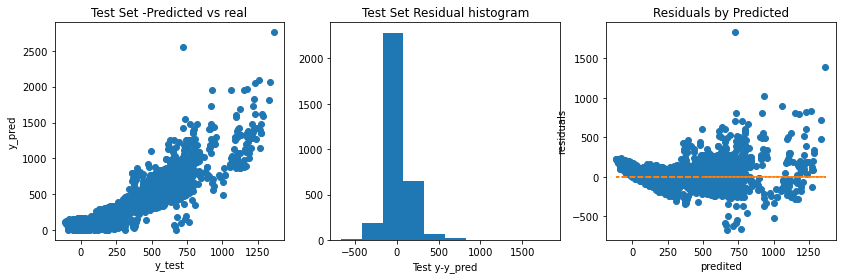

In [2286]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

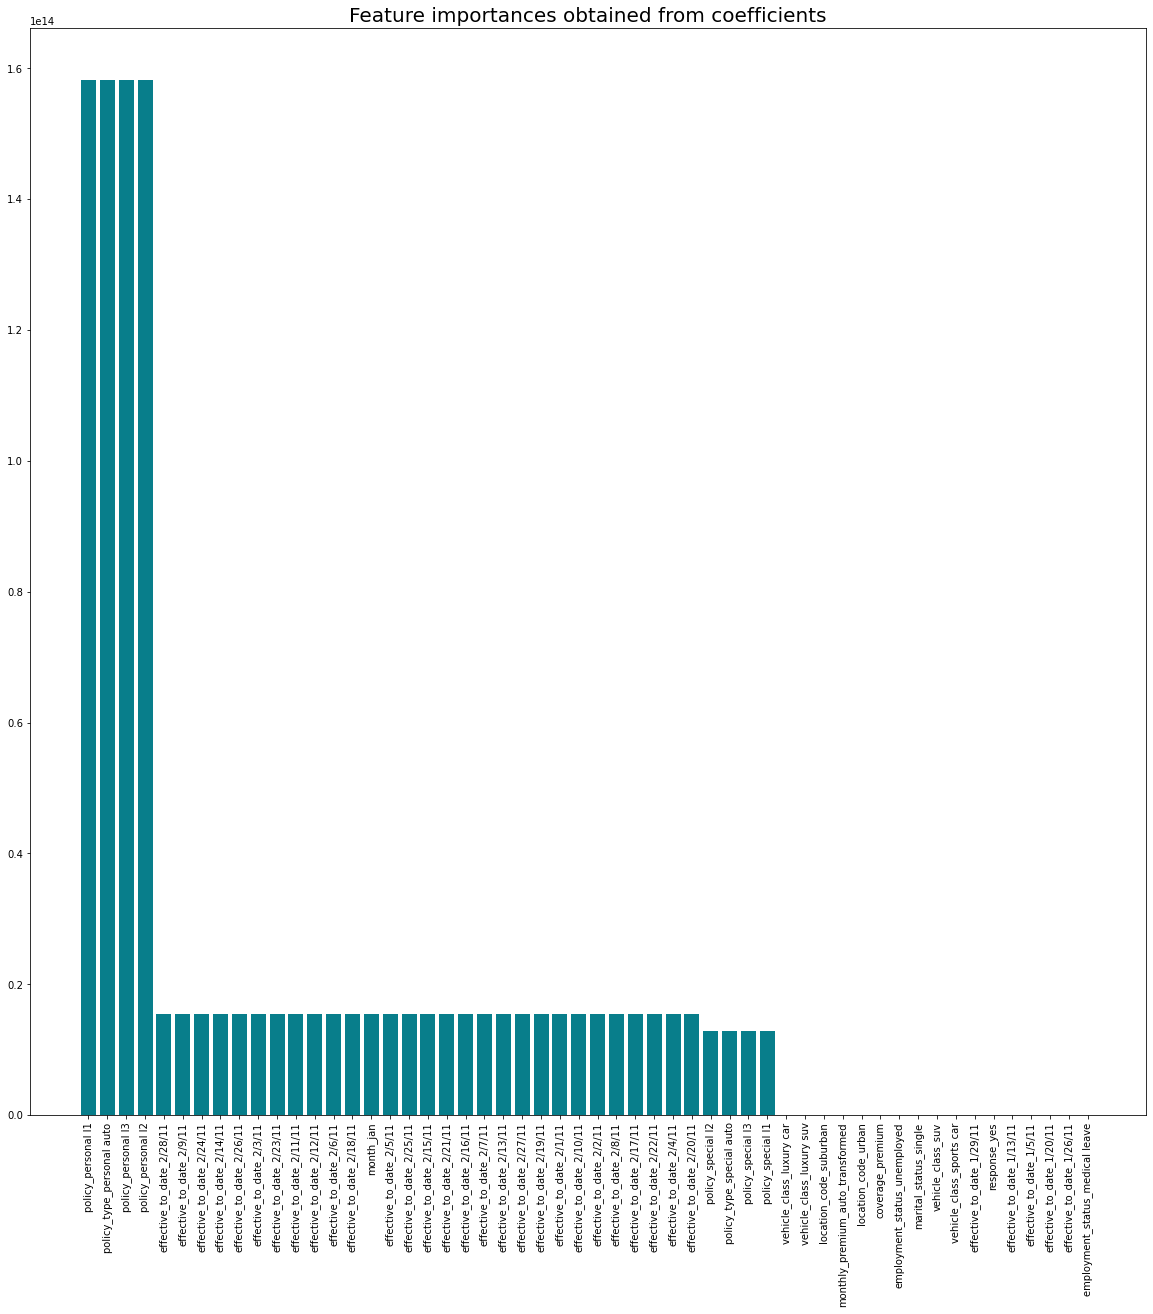

In [2287]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## QT, MinMax, AIC-optimized
MSE test:  21797.31404794634

MAE test:  101.12112420096663

MSE train:  22906.670277507572

0.7386883933729731

R2_test:  0.7386883933729731

R2_train:  0.7351847883325608

MSE train - MSE test:  1109.3562295612319

R2_test/R2_train:  1.0047656114435646

Adj_R2: 0.7337047009388912

## QT, Std-Scaler, AIC-optimized

MSE test:  21801.482657630462

MAE test:  101.12329393863263

MSE train:  22906.936191218505

0.738638419046248

R2_test:  0.738638419046248

R2_train:  0.7351817142063437

MSE train - MSE test:  1105.4535335880428

R2_test/R2_train:  1.0047018373459355

Adj_R2: 0.73365377350994

## PT, STD-Scaler, AIC-optimized

MSE test:  21541.391639302212

MAE test:  100.45371716308927

MSE train:  22199.9556682175

0.7417564546775702

R2_test:  0.7417564546775702

R2_train:  0.7433548443284943

MSE train - MSE test:  658.564028915287

R2_test/R2_train:  0.9978497622459594

Adj_R2: 0.7368312758093738

## PT, MinMax_Scaler, AIC-optimized

MSE test:  21540.508088576076

MAE test:  100.45255983005924

MSE train:  22199.970609296295

0.7417670469027993

R2_test:  0.7417670469027993

R2_train:  0.7433546716004245

MSE train - MSE test:  659.4625207202189

R2_test/R2_train:  0.9978642433305664

Adj_R2: 0.7368420700477987

## PT, MinMax_Scaler, AIC-optimized, not transforming num to obj

MSE test:  21470.585785946965

MAE test:  100.00541905402245

MSE train:  22342.368752493065

0.7426052928077251

R2_test:  0.7426052928077251

R2_train:  0.7417084613928794

MSE train - MSE test:  871.7829665460995

R2_test/R2_train:  1.0012091427582768

Adj_R2: 0.7381956119103956

## PT, MinMax_Scaler, AIC-optimized, normalizing num/obj

MSE test:  21470.585785946965

MAE test:  100.00541905402245

MSE train:  22342.368752493065

0.7426052928077251

R2_test:  0.7426052928077251

R2_train:  0.7417084613928794

MSE train - MSE test:  871.7829665460995

R2_test/R2_train:  1.0012091427582768

Adj_R2: 0.7381956119103956